In [42]:
import os
os.chdir('/rd2/user/xiacr/sle/other_sc_data/')
import numpy as np
import pandas as pd
import scanpy as sc
import harmonypy as hm
import importlib

import glob
import anndata as ad
import collections

import scanpy.external as sce
from mycolorpy import colorlist as mcp

import utils
importlib.reload(utils)

<module 'utils' from '/rd2/user/xiacr/sle/other_sc_data/utils.py'>

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=160, facecolor='white', fontsize=10)
sc._settings.ScanpyConfig.n_jobs = 36

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.19.0 scipy==1.8.0 pandas==1.4.1 scikit-learn==1.0.2 statsmodels==0.13.1 python-igraph==0.9.9 pynndescent==0.5.5


In [44]:
plasma = sc.read_h5ad('./output/03-plasma_raw.h5ad')
plasma = plasma.raw.to_adata()

In [ ]:
hm.run_harmony()

In [45]:
plasma = utils.do_harmony(plasma, hvg_batch=False,batch='dataset',theta=2,max_iter_harmony = 20)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


/home/xiacr/miniconda3/envs/sle/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)


/home/xiacr/miniconda3/envs/sle/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:02)


2022-03-25 17:14:13,406 - harmonypy - INFO - Iteration 1 of 20
2022-03-25 17:14:15,472 - harmonypy - INFO - Iteration 2 of 20
2022-03-25 17:14:17,718 - harmonypy - INFO - Iteration 3 of 20
2022-03-25 17:14:19,650 - harmonypy - INFO - Iteration 4 of 20
2022-03-25 17:14:21,688 - harmonypy - INFO - Iteration 5 of 20
2022-03-25 17:14:23,666 - harmonypy - INFO - Iteration 6 of 20
2022-03-25 17:14:24,931 - harmonypy - INFO - Iteration 7 of 20
2022-03-25 17:14:26,123 - harmonypy - INFO - Iteration 8 of 20
2022-03-25 17:14:27,158 - harmonypy - INFO - Iteration 9 of 20
2022-03-25 17:14:28,310 - harmonypy - INFO - Iteration 10 of 20
2022-03-25 17:14:29,384 - harmonypy - INFO - Iteration 11 of 20
2022-03-25 17:14:30,761 - harmonypy - INFO - Iteration 12 of 20
2022-03-25 17:14:31,615 - harmonypy - INFO - Iteration 13 of 20
2022-03-25 17:14:32,562 - harmonypy - INFO - Iteration 14 of 20
2022-03-25 17:14:33,664 - harmonypy - INFO - Iteration 15 of 20
2022-03-25 17:14:34,843 - harmonypy - INFO - Iter

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
running Leiden clustering
    finished: found 14 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


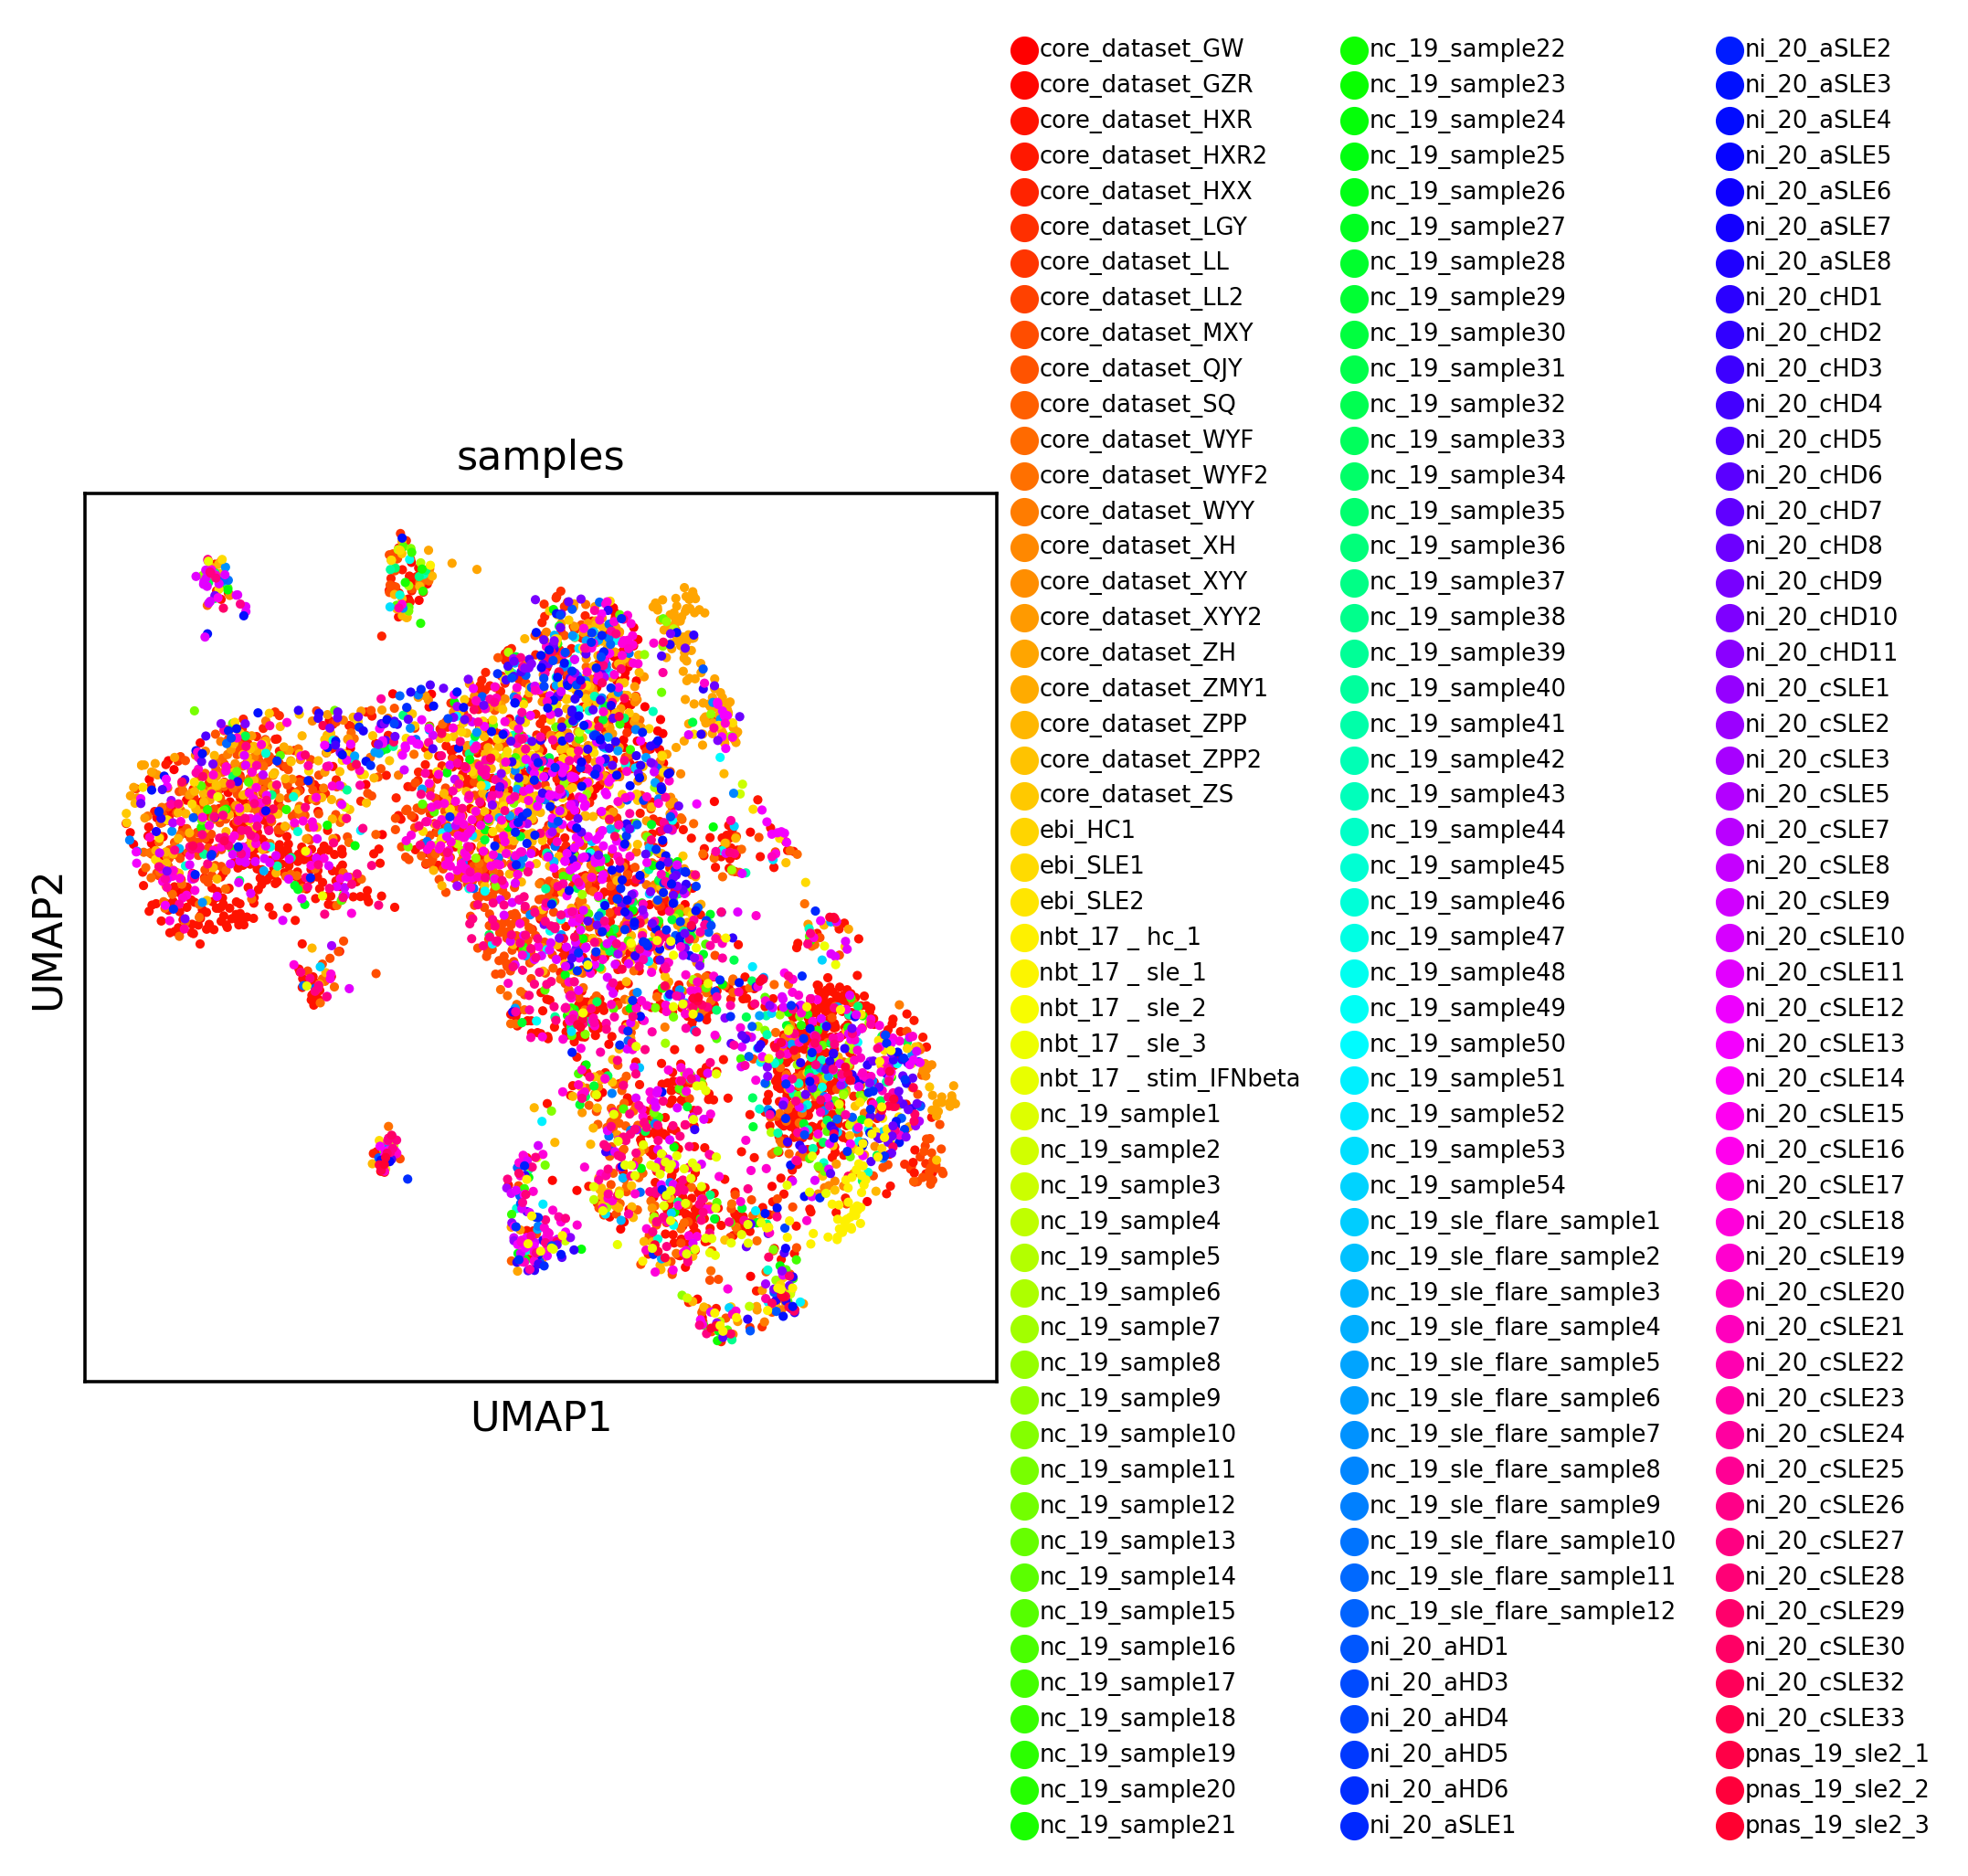

In [46]:
sc.pl.umap(plasma,color=['sample'], palette = mcp.gen_color(cmap="hsv",n=156),legend_fontsize='xx-small',outline_color='white',title='samples')

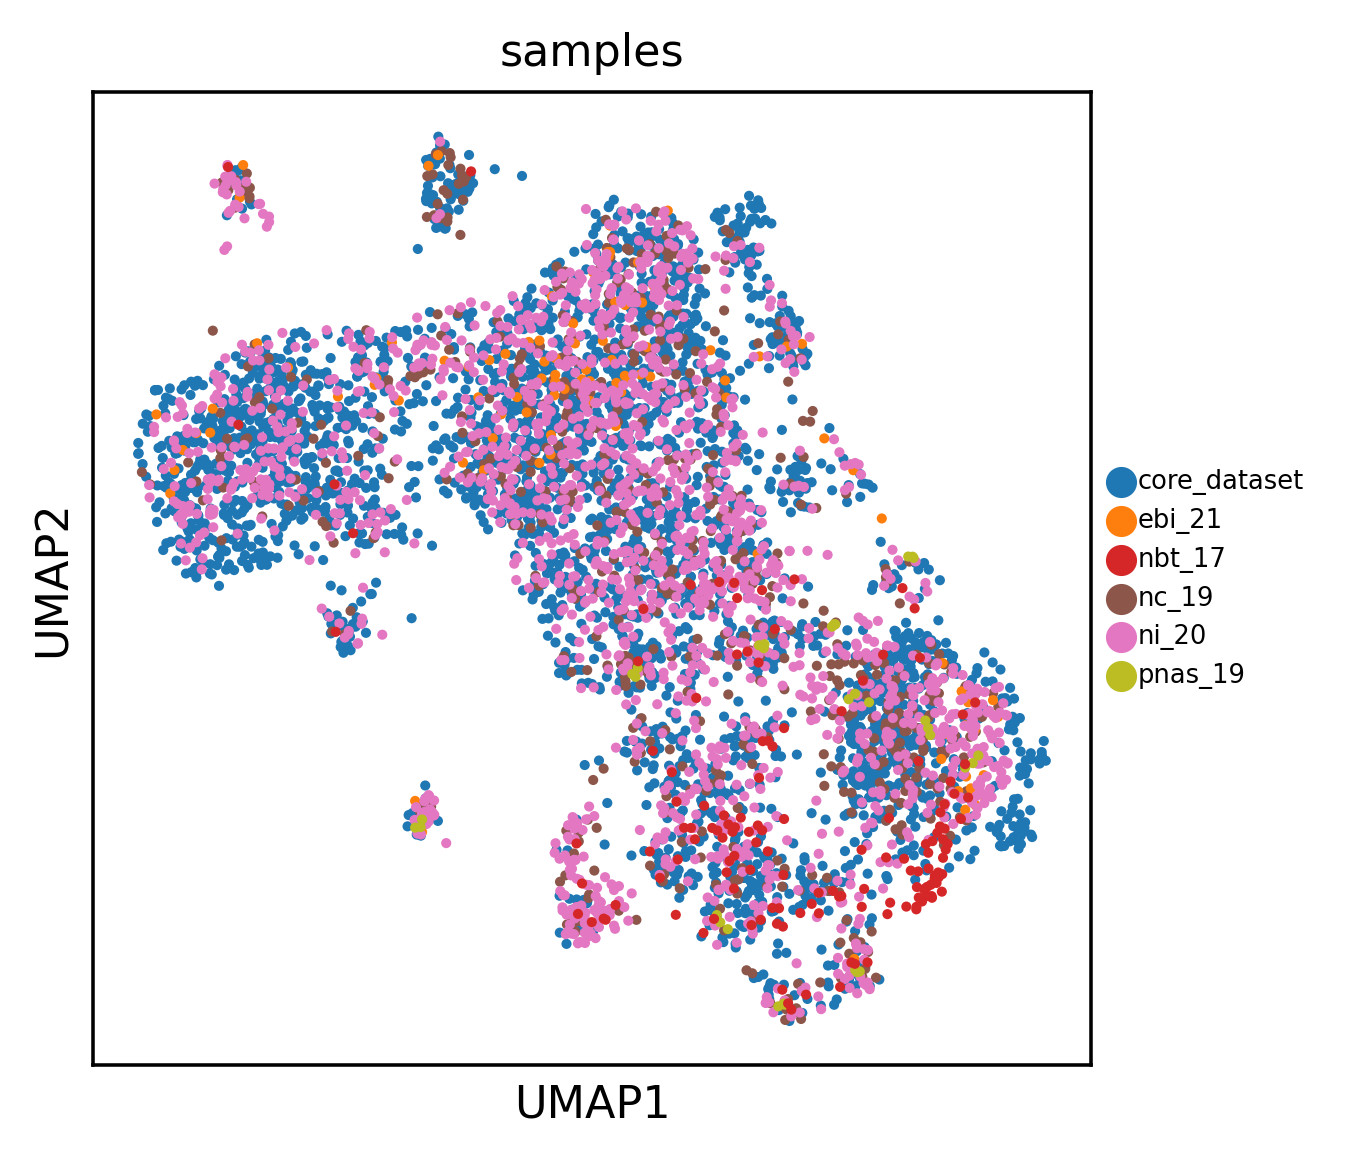

In [47]:
sc.pl.umap(plasma,color=['dataset'], palette = mcp.gen_color(cmap="tab10",n=7),legend_fontsize='xx-small',outline_color='white',title='samples')

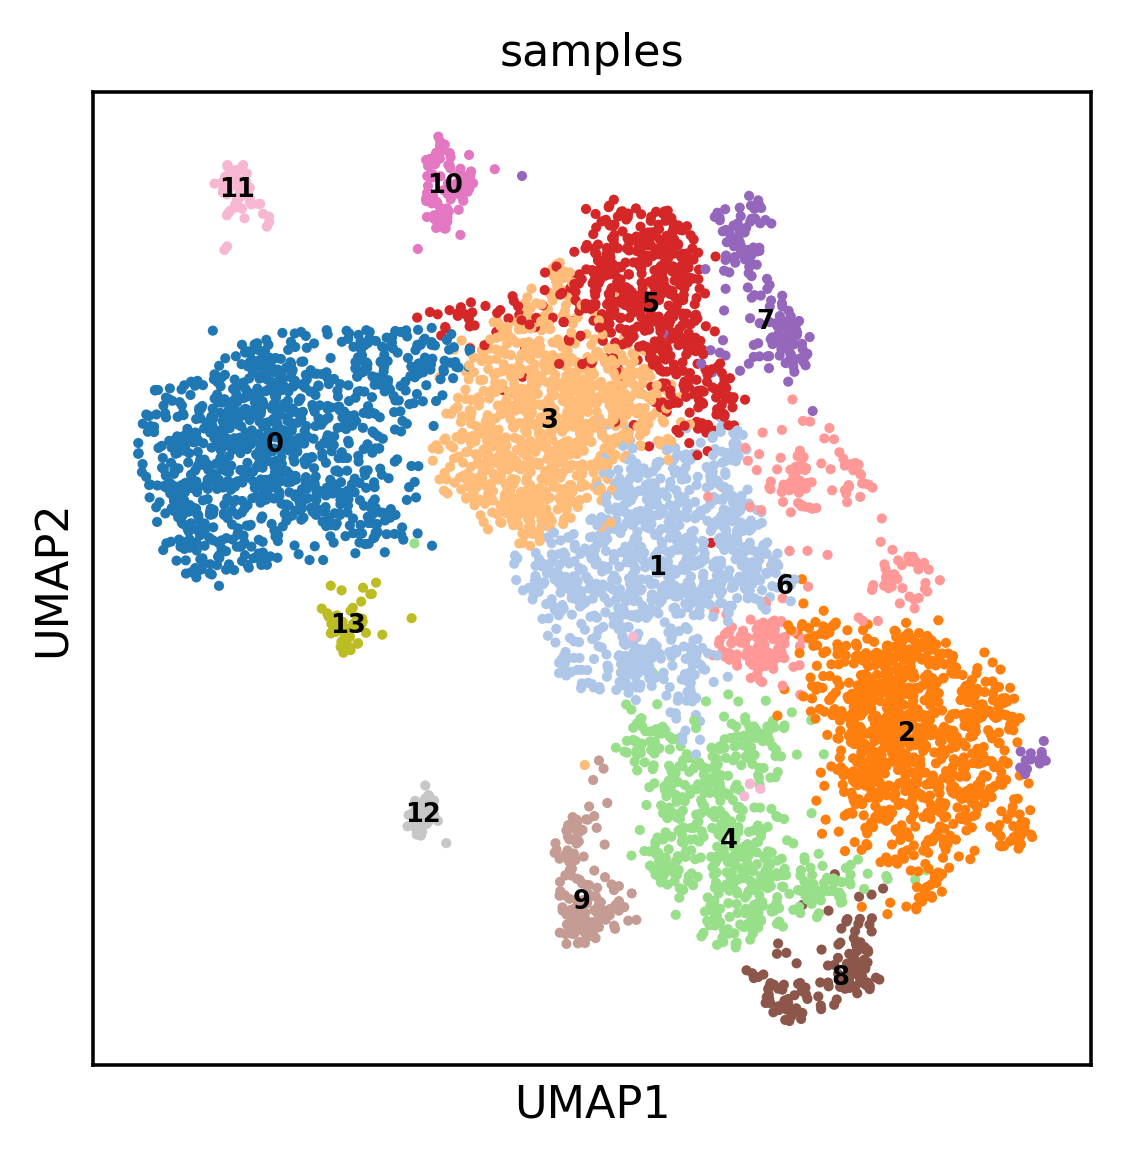

In [52]:
sc.pl.umap(plasma,color=['leiden'], palette = mcp.gen_color(cmap="tab20",n=17),legend_fontsize='xx-small',outline_color='white',title='samples',legend_loc='on data')

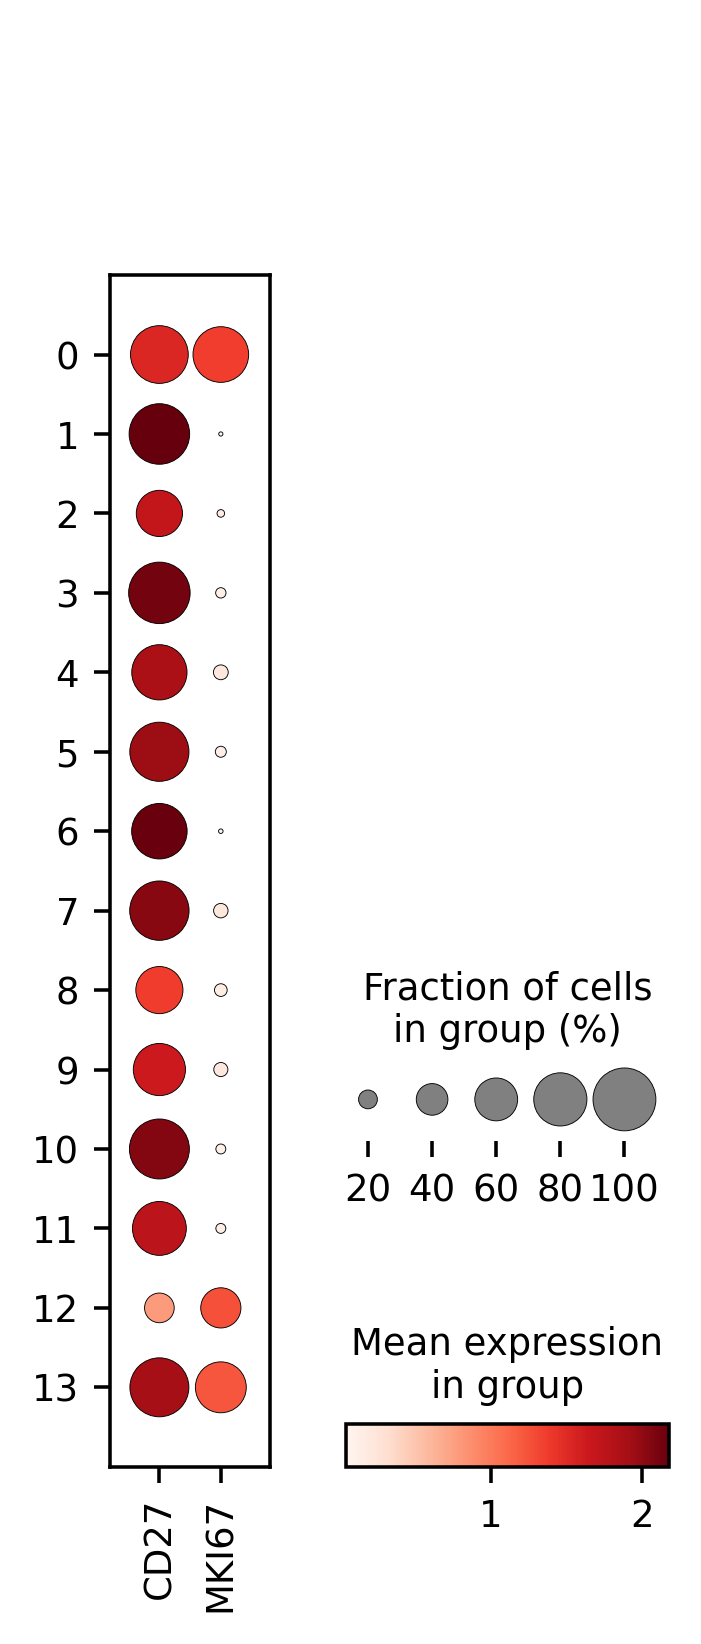

In [57]:
sc.pl.dotplot(plasma, ['CD27','MKI67'], groupby='leiden')